**Predict whether a customer will deposit**

**Objective**

The objective is to predict whether the customer will deposit amount in bank or not based on various features.These attributes provide valuable insights into the factors influencing deposits.

Target Variable(y):

* deposit: The customer responded positively to the campaign or not.

Features(x):

1. Age: The age of the customer, ranging from 18 to 91.
2. Job: The customer's job, including categories like "management", "blue-collar", "services", "admin.", "technician", "retired", "unemployed", and "entrepreneur".
3. Marital Status: The customer's marital status, categorized as "married", "single", "divorced", and "other".
4. Education: The customer's education level, including categories like "primary", "secondary", "tertiary", and "university.degree".
5. Default: Whether the customer has defaulted on a loan or not.
6. Balance: The customer's account balance.
7. Housing: Whether the customer owns a house or not.
8. Loan: Whether the customer has taken a loan or not.
9. Contact: The customer's contact method, categorized as "telephone", "cellular", and "unknown".
10. Day : The day of the week the customer was contacted, including "mon", "tue", "wed", "thu", "fri", and "sat".
11. Month: The month the customer was contacted, including "may", "jun", "nov", etc.
12. Campaign: The number of times the customer was contacted during the campaign.
13. Pdays: The number of days since the customer last contacted the bank.
14. Previous: The customer's previous outcome from a campaign.
15. Poutcome: The customer's outcome from a previous campaign.
16. Duration : How many days

**Data Source**

/kaggle/input/bank-marketing-dataset/bank.csv


**Import Library**

In [1]:
import pandas as pd
import numpy as np

**Import Dataset**

In [3]:
df=pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")

**Describe Data**

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Data Visualization**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

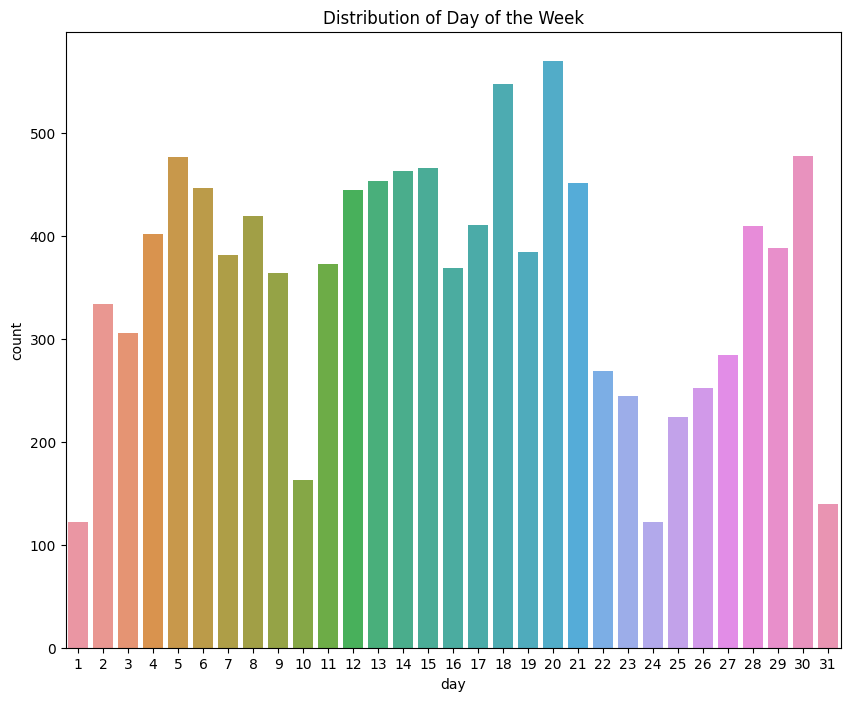

In [10]:
plt.figure(figsize=(10, 8))
sns.countplot(x='day', data=df)
plt.title('Distribution of Day of the Week')
plt.show()

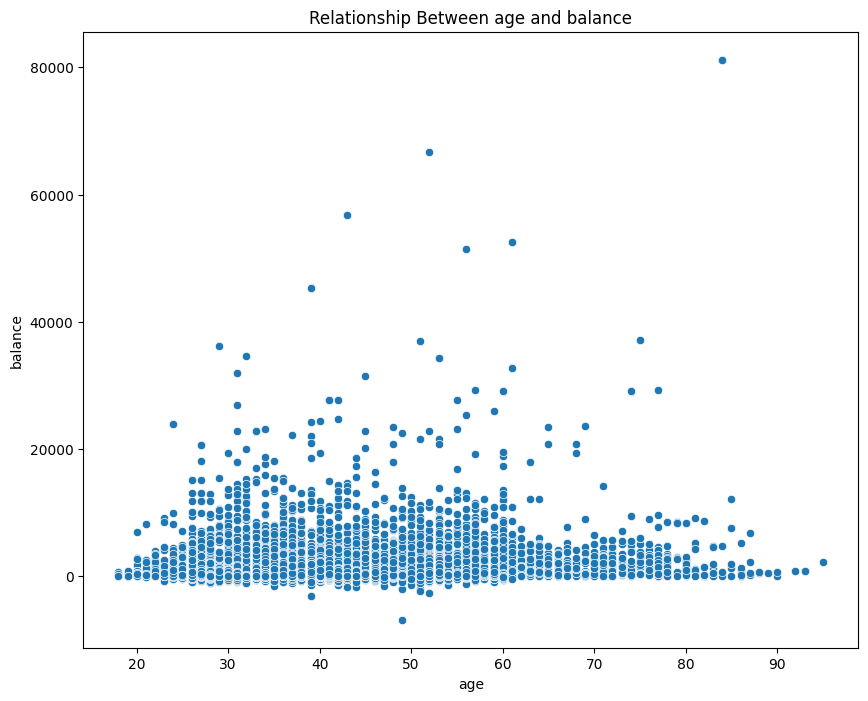

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Relationship Between age and balance')
plt.show()

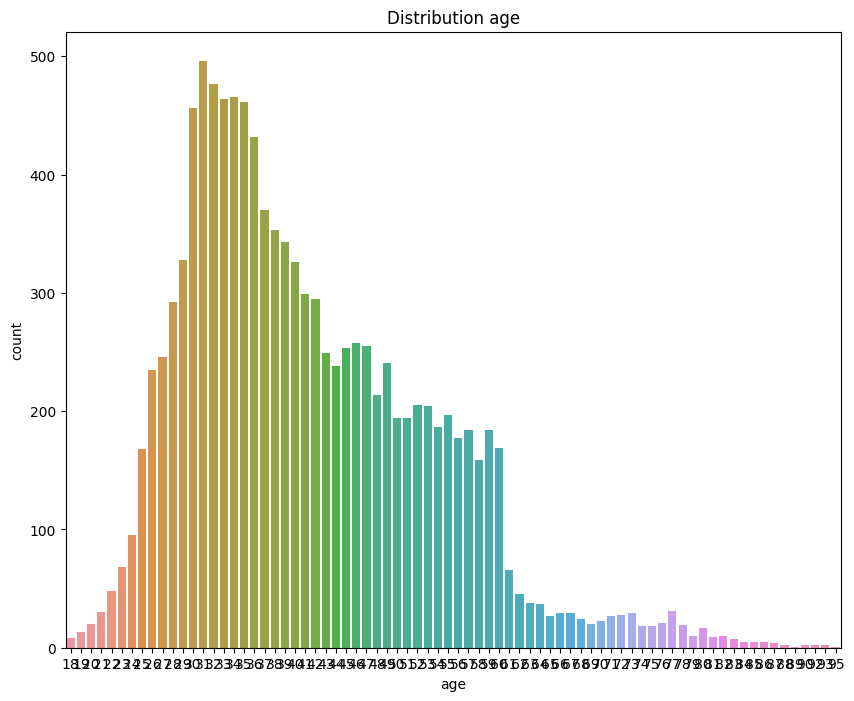

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(x='age', data=df)
plt.title('Distribution age')
plt.show()

In [46]:
a=df[['age','balance','day','duration','campaign']]
corr_matrix = a.corr()
print(corr_matrix)

               age   balance       day  duration  campaign
age       1.000000  0.112300 -0.000762  0.000189 -0.005278
balance   0.112300  1.000000  0.010467  0.022436 -0.013894
day      -0.000762  0.010467  1.000000 -0.018511  0.137007
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000


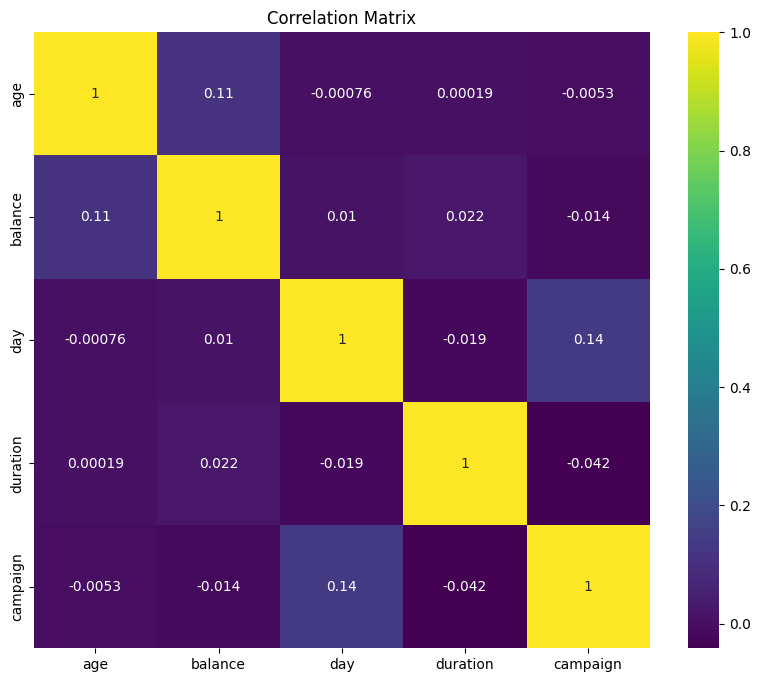

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x="age", y="campaign", hue="duration", data=data)
plt.show()

**Data Preprocessing**

In [19]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [21]:
# Convert categorical variables to numerical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data=df

In [25]:
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])

In [26]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes


**Define Target Variable (y) and Feature Variables (x)**

In [28]:
X = data.drop('deposit', axis=1)
y = data['deposit']

**Train test split**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8929, 16), (2233, 16), (8929,), (2233,))

**Modeling**

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

**Model Evaluation**

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Prediction**

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(X_test)
y_pred

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7630989699955217


In [42]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          no       0.77      0.78      0.78      1166
         yes       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [41]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[915 251]
 [278 789]]


**Explanation**

The code models a Decision Tree Classifier for the Bank Marketing Dataset.
It preprocesses the data by encoding categorical variables and handling missing values.
The model is trained on the preprocessed data and evaluated using metrics such as accuracy, precision, recall, and F1-score.
The trained model is then used to make predictions on new data.